In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/

%cd/gdrive/Shareddrives/MSBA Capstone Team/BA820_team_project/Dataset

Mounted at /gdrive
/gdrive
/gdrive/Shareddrives/MSBA Capstone Team/BA820_team_project/Dataset


In [ ]:
! pip install scikit-plot
! pip install emoji
! pip install newspaper3k
! pip install nltk
! pip install newspaper3k
! pip install spacy
! pip install wordcloud

In [ ]:
! pip install Afinn

     |████████████████████████████████| 61kB 4.4MB/s 
  Created wheel for Afinn: filename=afinn-0.1-cp37-none-any.whl size=53451 sha256=8e5bb33bb455af10f95f8d56c9b054d96a7a86e359dbfba796125f2f97612afd
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built Afinn


In [ ]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from pandas.tseries.offsets import CustomBusinessMonthBegin
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplot

# some "fun" packages
from wordcloud import WordCloud
import emoji

import re

# new imports
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
import nltk

from newspaper import Article



In [ ]:
from afinn import Afinn
from textblob import TextBlob

nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# ch = pd.read_csv('ch_review.csv',index_col= 0)
# ch.head()

# ch.shape

In [ ]:
## extract all of the review dataset in cleverland. 

cle = pd.read_csv('cle_review.csv',index_col= 0)
cle.head()


,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,attributes,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
business_id,,,,,,,,,,,,,,,,,,,,,
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",4xK2AMJhE-Iq9oqs63oPqw,h-jetz5lt09D_MXF_UdZ0A,5.0,4.0,2.0,3.0,New family business from Los Angeles. Pho was ...,2019-07-28 18:33:42
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",cz-jm7g1Wli7wTtliSl6lg,sdVAL7EuOCmN9Y2Zhm_hxg,4.0,0.0,0.0,0.0,The egg rolls - pretty great & fresh.\n\nThe l...,2019-10-25 02:06:29
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",tzwhl-xFnJ9v5-BnO36ivA,bh6rKHiOgg51omiYkQRquA,5.0,3.0,4.0,5.0,"TL, DR: Best banh mi in Cleveland.\n\n1. I ord...",2019-08-29 19:06:03
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",t-7SDtRASihHpTNpalluYw,YCcao-FE5wMhUSDh9eeD5A,5.0,1.0,1.0,2.0,"New restaurant, this location been under manag...",2019-09-24 01:53:11
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",Y9XbnZ01Uih9dfADzCHyTQ,_IKHZkxIA8w4y9cyRYOG2w,5.0,2.0,1.0,1.0,I only tried the bun bo hue but it was delicio...,2019-09-14 17:00:49


In [ ]:
cle.shape

(92323, 21)

In [ ]:
## look at the time span of the review 

cle['date'].sort_values(ascending=False)

business_id
TKaND6oV1n2ylnCYoAfoag    2019-12-13 15:35:41
Kuv-QSWUtOm5IjAxcFMl8A    2019-12-13 15:11:37
knJh7agyWMdPyndI9dURjw    2019-12-13 14:46:47
1Mf0UInsuxMNfJjzy0rTBQ    2019-12-13 07:05:59
cX2Nr_XmGYlMaBW35M0sUg    2019-12-13 06:35:08
                                 ...         
orrrhqRRUORIzUSxWTveKg    2005-07-28 01:56:42
wnyMhlR5KCWkTCzQ1_gOUQ    2005-07-28 00:08:04
wnyMhlR5KCWkTCzQ1_gOUQ    2005-07-25 21:57:31
orrrhqRRUORIzUSxWTveKg    2005-06-25 04:31:37
SYOzI_Ooe-rXI3ZqCybwSQ    2005-05-14 04:40:11
Name: date, Length: 92323, dtype: object

In [ ]:
## extract all the cleveland review data in 2019(the latest year in our dataset)


cle_2019 = cle[cle['date']>= '2019-01-01 00:00:00']
cle_2019.shape

df = cle_2019.copy()
df.head()

,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,attributes,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
business_id,,,,,,,,,,,,,,,,,,,,,
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",4xK2AMJhE-Iq9oqs63oPqw,h-jetz5lt09D_MXF_UdZ0A,5.0,4.0,2.0,3.0,New family business from Los Angeles. Pho was ...,2019-07-28 18:33:42
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",cz-jm7g1Wli7wTtliSl6lg,sdVAL7EuOCmN9Y2Zhm_hxg,4.0,0.0,0.0,0.0,The egg rolls - pretty great & fresh.\n\nThe l...,2019-10-25 02:06:29
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",tzwhl-xFnJ9v5-BnO36ivA,bh6rKHiOgg51omiYkQRquA,5.0,3.0,4.0,5.0,"TL, DR: Best banh mi in Cleveland.\n\n1. I ord...",2019-08-29 19:06:03
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",t-7SDtRASihHpTNpalluYw,YCcao-FE5wMhUSDh9eeD5A,5.0,1.0,1.0,2.0,"New restaurant, this location been under manag...",2019-09-24 01:53:11
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",Y9XbnZ01Uih9dfADzCHyTQ,_IKHZkxIA8w4y9cyRYOG2w,5.0,2.0,1.0,1.0,I only tried the bun bo hue but it was delicio...,2019-09-14 17:00:49


In [ ]:
df.index.unique().size

825

In [ ]:
## transform the text column (review) in lower case

df['text'] = df.text.str.lower()



In [ ]:
df.shape

(12129, 21)

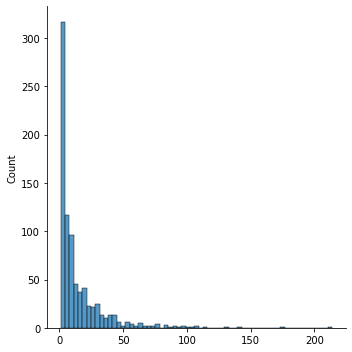

In [ ]:
## look at the distribution of the review in histgram.

tmp = df.groupby('business_id').size().sort_values(ascending= False)

sns.displot(data=tmp)

In [ ]:
tmp[tmp >= 100].shape

(9,)

In [ ]:
#summary statistics for review counts for each of the 825 restaurants

tmp.describe()

count    825.000000
mean      14.701818
std       21.051677
min        1.000000
25%        3.000000
50%        7.000000
75%       19.000000
max      214.000000
dtype: float64

In [ ]:
##Insight:  
##  The dataset contains 12129 review observations. 75% of the restaurants received less than 20 reviews in 2019, 
##  with the average count being around 15 and median count being 21. 
### Although only 9 restaurants were able to receive over 100 reviews, the most popular restaurant- Townhall- gained 214 reviews in just one year. 

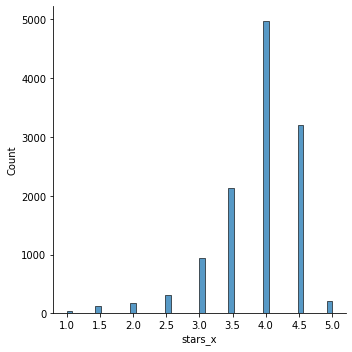

In [ ]:
# The distributions of overall ratings(one overall rating for one resturant) of the resturants


sns.displot(x = 'stars_x', data=df )

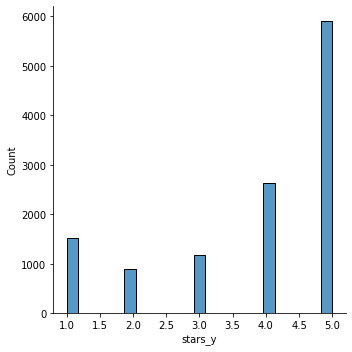

In [ ]:
# The distributions of  each's reviews ratings of the resturants (one resturants might have multiple reviews rating :stars_y)



sns.displot(x = 'stars_y', data=df )

In [ ]:
tmp

business_id
LNsZJP6jZ11e0tDljOLPiQ    214
cX2Nr_XmGYlMaBW35M0sUg    174
8KkpSMrfBz1c_0p3m6Y6dg    140
vdloJPM3bSpQTMlwdFek2A    131
tZpxk604kWWHsJKyirraZg    115
                         ... 
ILX7evKlwamn-029vWx0NQ      1
78V1WQHXc5UUfttHm07Grg      1
79BeasMZbY-zv7dWmbY0qQ      1
s7SaLKwhfRXZqYY6NClLew      1
dmu1wM0CRgeoTIUXFihU7Q      1
Length: 825, dtype: int64

In [ ]:
#  Examine the most popular resturants in Cleveland (with most reviews)

df.loc['LNsZJP6jZ11e0tDljOLPiQ'].head(5)
#df.sort_values(by='review_count',ascending=False)


,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,attributes,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
business_id,,,,,,,,,,,,,,,,,,,,,
LNsZJP6jZ11e0tDljOLPiQ,Townhall,1909 W 25th St,Cleveland,OH,44113,41.485492,-81.703914,4.0,1372,1,"{'HasTV': 'True', 'RestaurantsPriceRange2': '2...","Food, American (New), Salad, Sandwiches, Beer,...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",F6kIzXYoVOIoKu4s6Rbeew,pHKISjytTmP0LrP952_32w,5.0,2.0,1.0,1.0,i absolutely love townhall! every time i'm in ...,2019-03-19 02:13:36
LNsZJP6jZ11e0tDljOLPiQ,Townhall,1909 W 25th St,Cleveland,OH,44113,41.485492,-81.703914,4.0,1372,1,"{'HasTV': 'True', 'RestaurantsPriceRange2': '2...","Food, American (New), Salad, Sandwiches, Beer,...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",9s4ChvFY-2XP9hcvmll6aQ,KmCWo0-cXlvRN7bVn0cN4A,4.0,1.0,1.0,1.0,"i've been to townhall at least once before, wi...",2019-03-14 04:50:08
LNsZJP6jZ11e0tDljOLPiQ,Townhall,1909 W 25th St,Cleveland,OH,44113,41.485492,-81.703914,4.0,1372,1,"{'HasTV': 'True', 'RestaurantsPriceRange2': '2...","Food, American (New), Salad, Sandwiches, Beer,...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",9TFPPWWpDtdW5mEU9kqvsQ,QLr0eTpmN1o9UIXgFuezJg,5.0,0.0,0.0,0.0,went here last weekend to pre-game before beer...,2019-02-01 20:48:34
LNsZJP6jZ11e0tDljOLPiQ,Townhall,1909 W 25th St,Cleveland,OH,44113,41.485492,-81.703914,4.0,1372,1,"{'HasTV': 'True', 'RestaurantsPriceRange2': '2...","Food, American (New), Salad, Sandwiches, Beer,...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",oiNubi7mOyQ_Njx_vs_R1w,FLVxlD8o5kko8NouQW6ZXg,1.0,0.0,0.0,0.0,i only liked the fries i'm from toledo ohio i'...,2019-03-29 18:22:41
LNsZJP6jZ11e0tDljOLPiQ,Townhall,1909 W 25th St,Cleveland,OH,44113,41.485492,-81.703914,4.0,1372,1,"{'HasTV': 'True', 'RestaurantsPriceRange2': '2...","Food, American (New), Salad, Sandwiches, Beer,...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",a5g9wNdKJVkfqEWO7msSFw,xl241CE1PuPv1h7N69oMDA,4.0,1.0,1.0,1.0,i really enjoyed the founders beer. it was ver...,2019-05-19 00:34:06


In [ ]:
df.useful.unique()

array([  4.,   0.,   3.,   1.,   2.,   6.,   8.,   7.,   9.,   5.,  10.,
        12.,  11.,  13.,  16.,  17.,  18.,  14.,  68.,  21.,  26.,  39.,
        24.,  15., 103.,  20.])

In [ ]:
txt = [t.lower() for t in df['text']]
len(txt)



12129

In [ ]:
 # TEXT ANALYSIS
 
 
 import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords
STOPWORDS = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
PATTERN = "[\w']+"

cv = CountVectorizer(max_features=250, stop_words=STOPWORDS, ngram_range=(1,1), binary=True,token_pattern=PATTERN)
tokens = cv.fit_transform(txt)
tarr= tokens.toarray()

In [ ]:
# Look at the most commonm words appear in reviews and their count number 

cv.vocabulary_
cv.get_feature_names()

t = pd.DataFrame(tarr, columns=cv.get_feature_names())
t.head()
t.sum(axis=0).sort_values(ascending=False).head(50)

food          6004
good          4414
great         4287
place         4249
service       3700
back          2992
time          2688
like          2570
one           2468
would         2453
go            2329
also          2288
get           2283
delicious     2230
ordered       2080
really        2066
restaurant    1994
cleveland     1985
got           1924
best          1864
nice          1818
menu          1807
well          1754
definitely    1698
try           1651
order         1646
came          1616
us            1608
friendly      1607
staff         1601
amazing       1570
chicken       1523
even          1517
little        1483
love          1407
come          1403
i've          1403
bar           1400
recommend     1349
made          1347
i'm           1347
went          1337
first         1326
experience    1250
sauce         1223
could         1214
never         1181
always        1180
fresh         1152
everything    1149
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

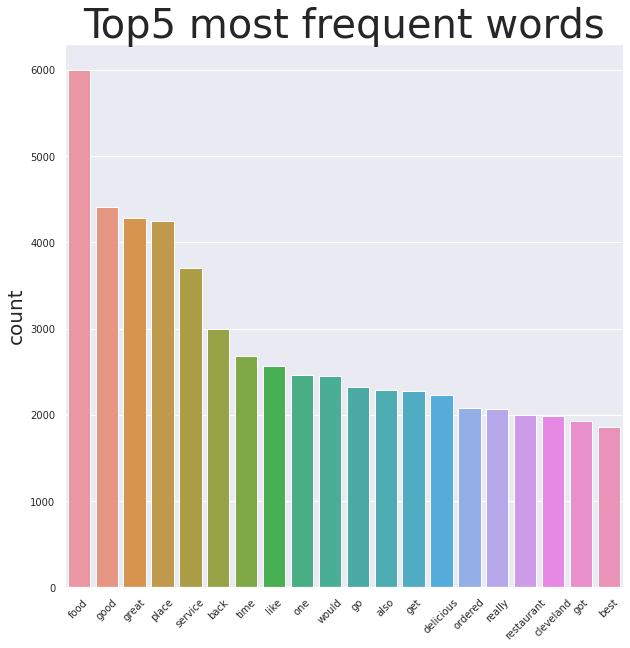

In [ ]:
# TOP 20 most frequent words

stop2=["come","back","really","go","ever",'every','make','sure','food','service','ohio','recommend','would','definitely','time','pretty','even','though','next']


sns.set(rc={'figure.figsize':(10,10)})
freq_word = t.sum(axis=0).sort_values(ascending=False).head(20)

freq_word = pd.DataFrame(freq_word)
freq_word.columns=['count']

b= sns.barplot(data=freq_word, x=freq_word.index, y='count' )
b.axes.set_title("Top5 most frequent words",fontsize=40)
# b.set_xlabel(fontsize=40)
b.set_ylabel("count",fontsize=20)
b.tick_params(labelsize=10)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

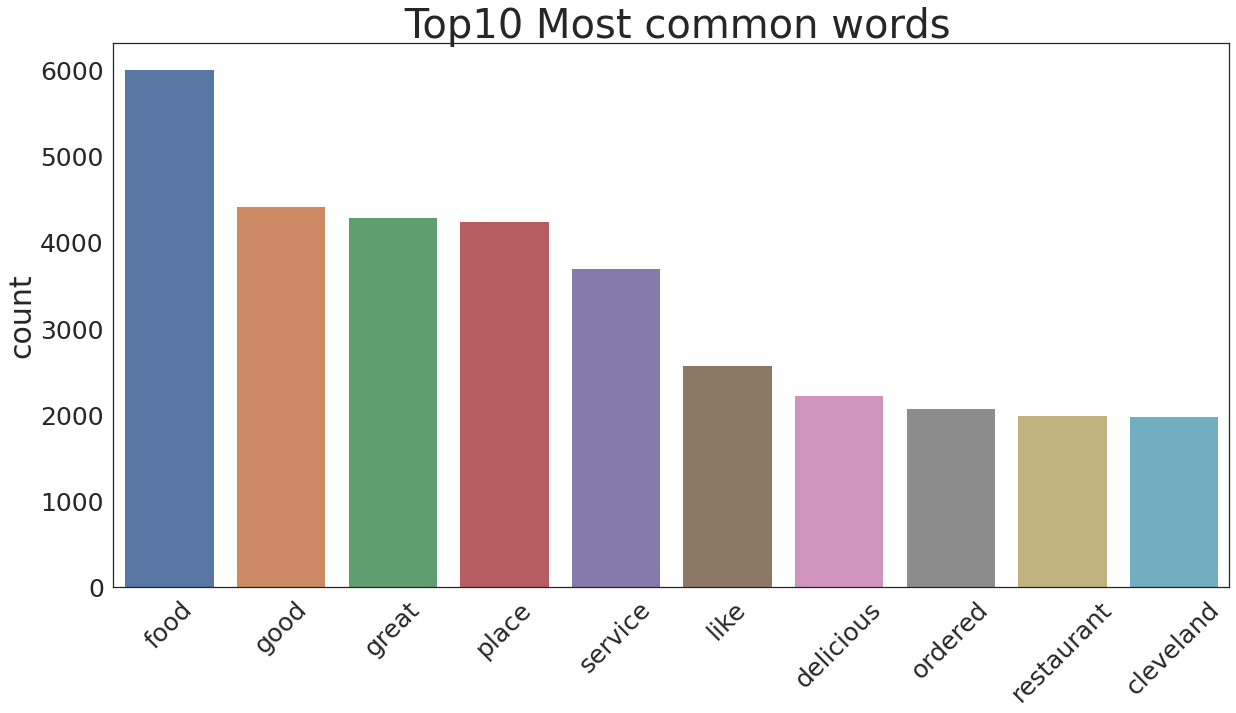

In [ ]:
## Look at the TOP 20  most commonm words appeared in reviews and their count number
##  Excluding some of the words as belows   


## excluding some of the words we are not interested :
stop2=["come",'also',"back","really","go","ever",'every','make','sure','recommend','would','definitely','time','pretty','even','though','next','got','get','one','time']

stopwords2= set(STOPWORDS)
stopwords2.update(stop2)

cv_clean = CountVectorizer(max_features=250, stop_words=stopwords2, ngram_range=(1,1), binary=True,token_pattern=PATTERN)
tokens_clean = cv_clean.fit_transform(txt)

cv_clean.vocabulary_
cv_clean.get_feature_names()
tarr_clean = tokens_clean.toarray()

t_clean = pd.DataFrame(tarr_clean, columns=cv_clean.get_feature_names())
t_clean.sum(axis=0).sort_values(ascending=False).head(50)


sns.set(rc={'figure.figsize':(20,10)})
freq_word_clean = t_clean.sum(axis=0).sort_values(ascending=False).head(10)

freq_word_clean = pd.DataFrame(freq_word_clean)
freq_word_clean.columns=['count']

sns.set_style("white")
fq= sns.barplot(data=freq_word_clean, x=freq_word_clean.index, y='count' )
fq.axes.set_title(" Top10 Most common words",fontsize=40)
# b.set_xlabel(fontsize=40)
fq.set_ylabel("count",fontsize=30)
fq.tick_params(labelsize=25)
plt.xticks(rotation = 45)



In [ ]:
PATTERN = "[\w']+"


stop=["come","back","really","go","ever",'every','make','sure','food','service','ohio','recommend','would','definitely','time','pretty','even','though','next']
stopwords= set(STOPWORDS)
stopwords.update(stop)

cv2 = CountVectorizer(max_features=250, stop_words=stopwords, ngram_range=(2,2), binary=True,token_pattern=PATTERN)
tokens2 = cv2.fit_transform(txt)
cv2.vocabulary_
cv2.get_feature_names()
tarr2= tokens2.toarray()

In [ ]:
t2 = pd.DataFrame(tarr2, columns=cv2.get_feature_names())
t2.head()
t2.sum(axis=0).sort_values(ascending=False).head(50)

happy hour            362
great place           296
staff friendly        240
one best              237
love place            217
can't wait            216
5 stars               199
one favorite          182
ice cream             179
feel like             169
place great           159
tasted like           157
friendly staff        152
mac cheese            151
chicken sandwich      151
great experience      150
little italy          150
fried chicken         149
great atmosphere      138
parking lot           130
wait staff            128
pork belly            127
20 minutes            126
i've never            125
15 minutes            125
felt like             122
also ordered          121
super friendly        121
10 minutes            121
beer selection        120
best i've             118
last night            118
also good             116
good great            115
much better           115
also got              115
30 minutes            114
place good            114
sat bar     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

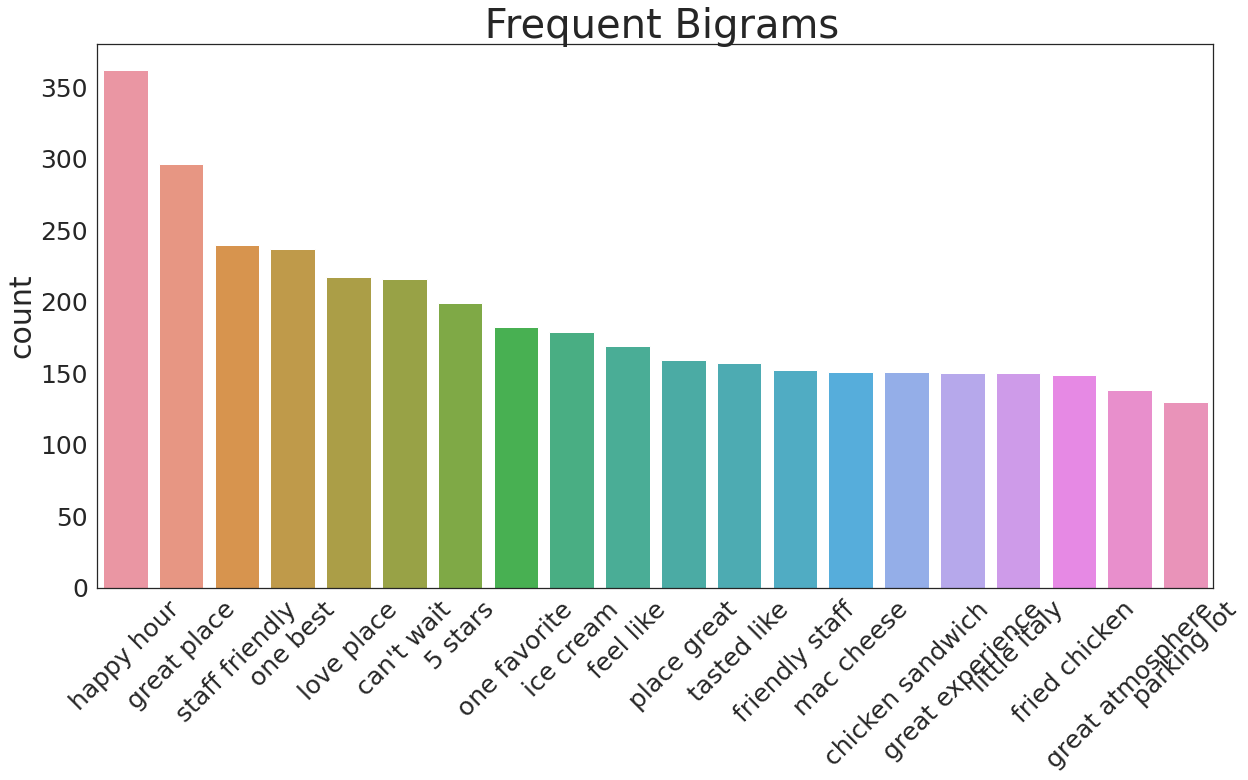

In [ ]:
## TOP 20 most frequent bigram(already excluded some of the words we are not interested )


freq_word2 = t2.sum(axis=0).sort_values(ascending=False).head(20)

freq_word2 = pd.DataFrame(freq_word2)
freq_word2.columns=['count']

c = sns.barplot(data=freq_word2, x=freq_word2.index, y='count' )

sns.set_style("white")
c.axes.set_title(" Frequent Bigrams",fontsize=40)
# b.set_xlabel(fontsize=40)
c.set_ylabel("count",fontsize=30)
c.tick_params(labelsize=25)
plt.xticks(rotation = 45)

In [ ]:
PATTERN = "[\w']+"

cv3 = CountVectorizer(max_features=250, stop_words=stopwords, ngram_range=(3,3), binary=True,token_pattern=PATTERN)
tokens3 = cv3.fit_transform(txt)
cv3.vocabulary_
cv3.get_feature_names()
tarr3= tokens3.toarray()

t3 = pd.DataFrame(tarr3, columns=cv3.get_feature_names())
t3.head()
t3.sum(axis=0).sort_values(ascending=False).head(50)

seated right away           46
one favorite places         44
mac n cheese                44
west side market            38
sweet potato fries          37
can't say enough            37
staff super friendly        36
french onion soup           35
roll hall fame              34
can't wait try              33
happy hour menu             32
one favorite restaurants    31
try something new           31
beef noodle soup            31
rock roll hall              29
made us feel                26
great beer selection        24
nothing write home          24
overall great experience    24
fried chicken sandwich      23
christmas story house       23
total reviews 2019          23
hot chicken sandwich        23
yelp reviews reviewed       23
give another try            22
great happy hour            22
3 5 stars                   22
went happy hour             22
staff always friendly       21
one best i've               21
fried green tomatoes        20
enough good things          20
give pla

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

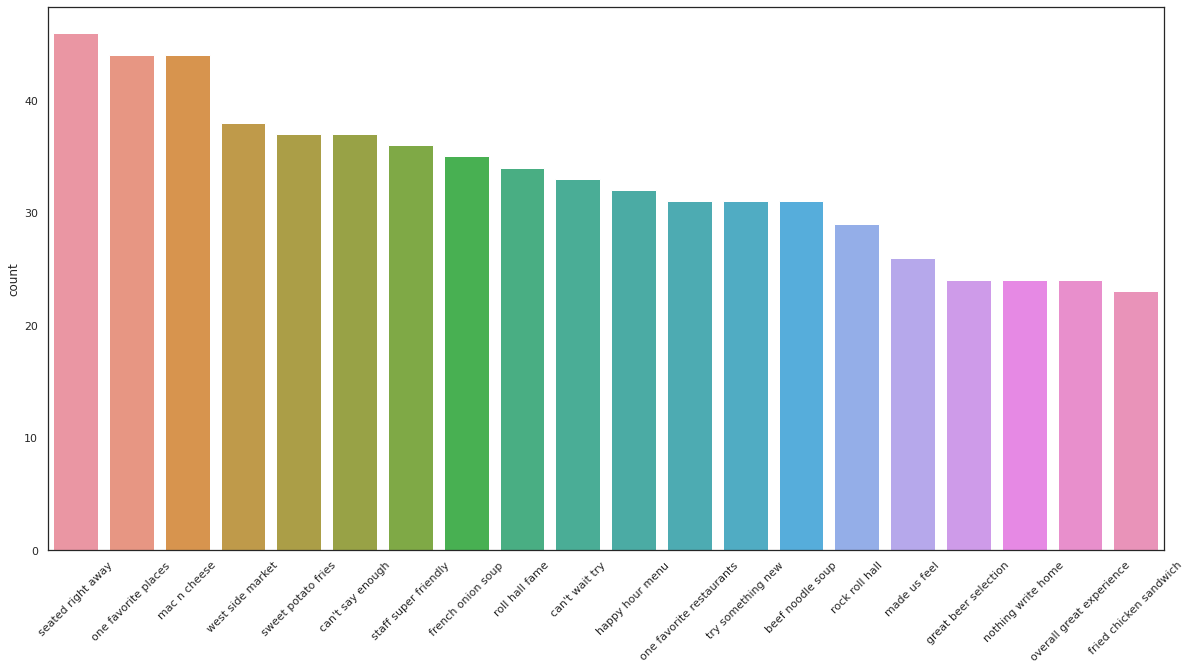

In [ ]:
## TOP 20 most frequent trigram (excluded some of the words we are not interested)

freq_word3 = t3.sum(axis=0).sort_values(ascending=False).head(20)

freq_word3 = pd.DataFrame(freq_word3)
freq_word3.columns=['count']

sns.barplot(data=freq_word3, x=freq_word3.index, y='count' )
plt.xticks(rotation = 45)




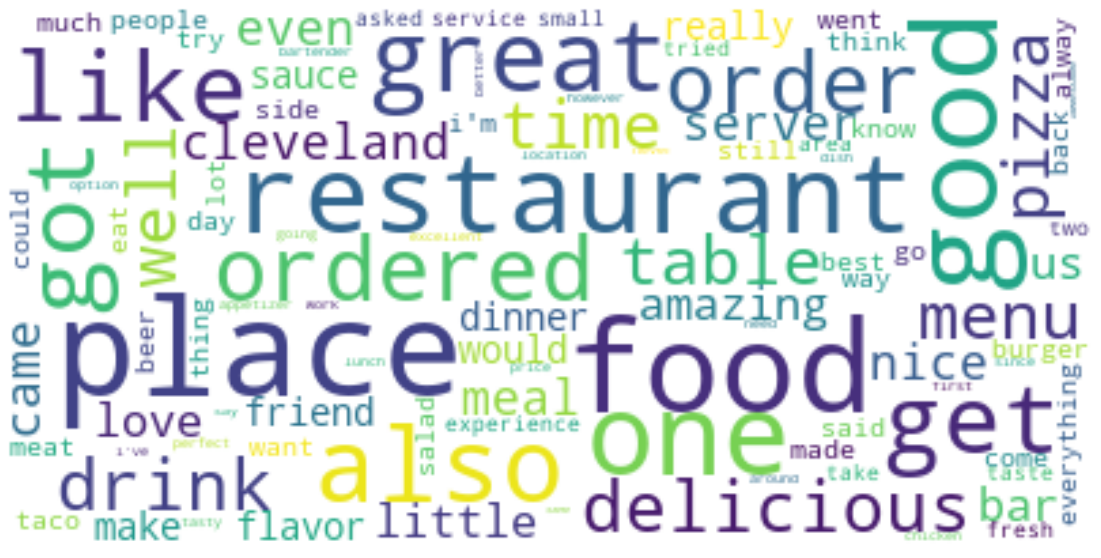

In [ ]:
## Create a word cloud for all the reviews 


sns.set(rc={'figure.figsize':(20,10)})

text = df['text'].copy()
wordcloud = WordCloud(stopwords=STOPWORDS,max_font_size=50, max_words=100, background_color="white").generate(' '.join(t for t in text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

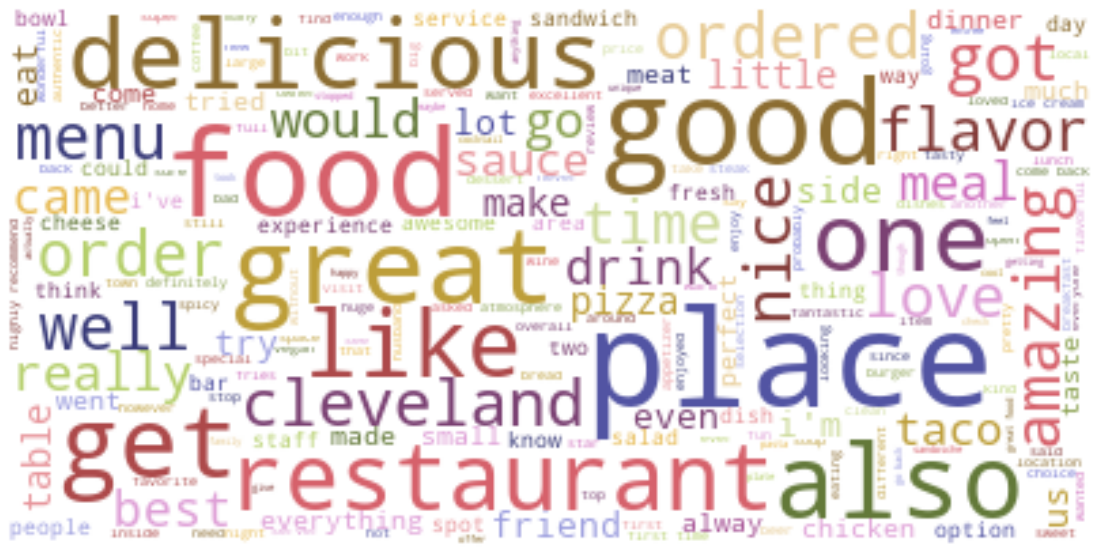

In [ ]:
# Create a word cloud for all those reviews related to the highest rating resturants


high_df = df[df.stars_x >= 4.5]

text1 = high_df['text']
sns.set(rc={'figure.figsize':(20,10)})

wordcloud = WordCloud(stopwords=STOPWORDS,max_font_size=50, max_words=1000, background_color="white",colormap= 'tab20b').generate(' '.join(t for t in text1))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

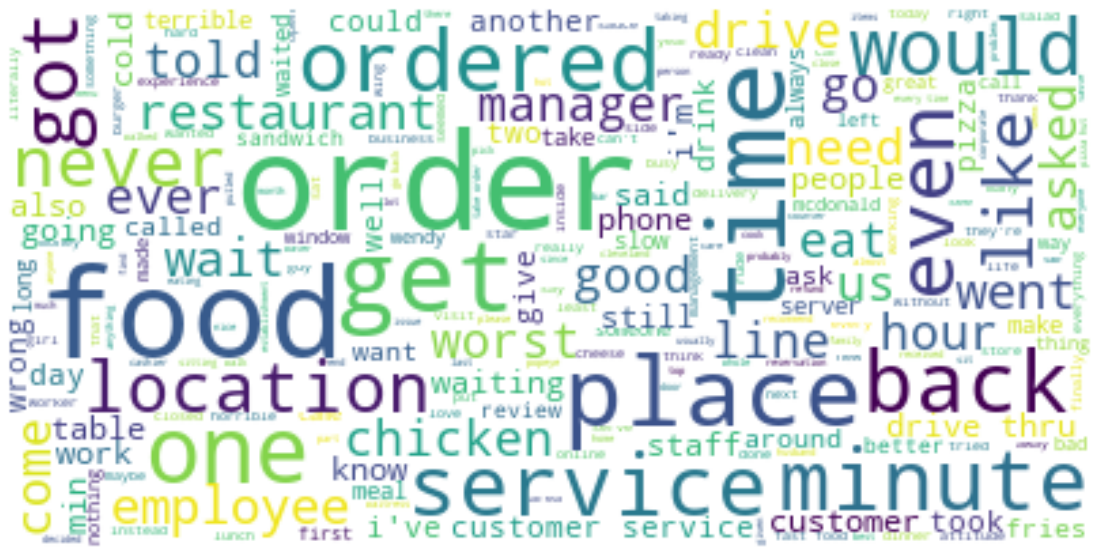

In [ ]:
## Create a word cloud for all those reviews related to the lowest rating resturants


low_df = df[df.stars_x <= 2]

text2 = low_df['text']
sns.set(rc={'figure.figsize':(20,10)})


wordcloud = WordCloud(stopwords=STOPWORDS,max_font_size=50, max_words=1000, background_color="white").generate(' '.join(t for t in text2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
df.rename(columns={'stars_x':'rating'},inplace=True)
higher_df = df[(df['rating']>4)  & (df['stars_y']> 4)]



lower_df = df[(df['rating']<3.5) & (df['stars_y'] < 3.5)]


In [ ]:
PATTERN = "[\w']+"

cv_higher = CountVectorizer(max_features=250, stop_words=STOPWORDS, ngram_range=(1,2), binary=True,token_pattern=PATTERN)
tokens = cv.fit_transform(higher_df.text)
tarr= tokens.toarray()



In [ ]:
higher_df.shape

(2255, 21)

In [ ]:
lower_df.shape

(1064, 21)

In [ ]:
import nltk
nltk.download('wordnet')

import string
import itertools 
import re
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.stem import PorterStemmer
import nltk


stops = ['the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then','went','think','order','yelp','review'
              'just','so','than','such','both','through','about','for','is','of','while','during','to','What','Which','get','always','got','came',
              'Is','If','While','This',"come","back","really","go","ever",'every','make','sure','also','well','ohio','recommend','would',
              'definitely','time','pretty','even','though','next','like','restaurant','very','veri','cleveland','food','place']


stopwords= set(STOPWORDS)
stopwords.update(stops)


# punct = list(string.punctuation)
# punct.append("''")
# punct.append(":")
# punct.append("...")
# punct.append("@")
# punct.append('""')



def cleanData(text, lowercase = False, remove_stops = False, stemming = False, lemmatization = False):
    
    txt = str(text)
    
    txt = re.sub(r'[^A-Za-z\s]',r' ',txt)
    
     
    if lowercase:
        txt = " ".join([w.lower() for w in txt.split()])
        
    if remove_stops:
        txt = " ".join([w for w in txt.split() if w not in stops])

    if stemming:
        st = PorterStemmer()
        txt = " ".join([st.stem(w) for w in txt.split()])
        wordnet_lemmatizer = WordNetLemmatizer()
        txt = " ".join([wordnet_lemmatizer.lemmatize(w, pos='v') for w in txt.split()])

    return txt
    


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df['text']=df['text'].map(lambda x: cleanData(x, lowercase=True, remove_stops=True,stemming=True))

higher_df['text'] = higher_df['text'].map(lambda x: cleanData(x, lowercase=True, remove_stops=True,stemming=True))
lower_df['text'] = lower_df['text'].map(lambda x: cleanData(x, lowercase=True, remove_stops=True,stemming=True))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#！pip install pyLDAvis

!python -m pip install -U pyLDAvis

     |████████████████████████████████| 1.7MB 8.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=bf67cc125aee5be092d36608928fddd0f708f88baea91f7a7d798001a82147bf
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [ ]:
# 
CV_all = CountVectorizer(min_df=5, max_df=0.25, stop_words=stopwords, ngram_range=(1,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
TOKENS_all = CV_all.fit_transform(df.text)

CV_all_bi = CountVectorizer(min_df=5, max_df=0.8, stop_words=stopwords2, ngram_range=(2,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
TOKENS_bi_all = CV_all_bi.fit_transform(df.text)


from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD


NUM_TOPICS = 10

lda_all = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda_all = lda_all.fit_transform(TOKENS_all)

import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_all, TOKENS_all, CV_all, mds='tsne')
vis


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
9      32.420952   8.115230       1        1  20.380589
7       0.648955  71.707100       2        1  17.661483
6      71.019684   9.971006       3        1  14.599511
2       3.785981  33.185135       4        1  14.541284
1     -42.666500  -9.222070       5        1   9.163784
0      -3.621689 -43.526516       6        1   8.204358
5      -3.632402  -4.171708       7        1   6.247166
3     -36.584400  35.804413       8        1   3.779984
8      44.391380  50.615383       9        1   2.793433
4      40.235809 -31.591665      10        1   2.628408, topic_info=         Term         Freq        Total Category  logprob  loglift
11607   pizza  1700.000000  1700.000000  Default  30.0000  30.0000
15377    taco  1151.000000  1151.000000  Default  29.0000  29.0000
4187     dish  1416.000000  1416.000000  Default  28.0000  28.0000
1324     beer  1591.000000  1591.000000  Default  27.0000  27.0000
3779   delici  2601.000000  2601.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
15573    tast    81.828060  1735.629995  Topic10  -5.2893   0.5843
16035     top    75.239067  1096.441089  Topic10  -5.3733   0.9596
1083      bar    75.497219  1973.313788  Topic10  -5.3698   0.3754
996       bad    65.474171   806.073897  Topic10  -5.5123   1.1283
4382    drink    65.541850  2420.753209  Topic10  -5.5112   0.0296

[676 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
24         1  0.182662         absolut
24         4  0.633328         absolut
24         5  0.131756         absolut
24         7  0.050906         absolut
27         4  0.995800  absolut delici
...      ...       ...             ...
17540     10  0.004090            year
17541      5  0.974813        year ago
17541     10  0.019693        year ago
17589      1  0.120360             yum
17589      6  0.874193             yum

[1516 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 8, 7, 3, 2, 1, 6, 4, 9, 5])

In [ ]:
lda_all_bi = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda_all_bi = lda_all_bi.fit_transform(TOKENS_bi_all)


pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_all_bi, TOKENS_bi_all, CV_all_bi, mds='tsne')
vis


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5      32.420952   8.115230       1        1  11.306237
0       0.648955  71.707100       2        1  10.648607
3      71.019684   9.971006       3        1  10.617179
8       3.785981  33.185135       4        1  10.196685
1     -42.666500  -9.222070       5        1  10.029073
7      -3.621689 -43.526516       6        1   9.619611
9      -3.632402  -4.171708       7        1   9.589460
6     -36.584400  35.804413       8        1   9.573272
2      44.391380  50.615383       9        1   9.555926
4      40.235809 -31.591665      10        1   8.863951, topic_info=                 Term        Freq       Total Category  logprob  loglift
5307       happi hour  459.000000  459.000000  Default  30.0000  30.0000
2456    custom servic  303.000000  303.000000  Default  29.0000  29.0000
5643        ice cream  283.000000  283.000000  Default  28.0000  28.0000
5143     great servic  363.000000  363.000000  Default  27.0000  27.0000
10718  staff friendli  252.000000  252.000000  Default  26.0000  26.0000
...               ...         ...         ...      ...      ...      ...
9162       rice noodl   38.934018   43.163947  Topic10  -5.8126   2.3200
7052      minut befor   48.361157   72.005007  Topic10  -5.5957   2.0251
2356        crab cake   41.875866   60.126847  Topic10  -5.7397   2.0614
8805        prime rib   39.742552   58.677373  Topic10  -5.7920   2.0335
1560       burger fri   38.623676   67.513271  Topic10  -5.8206   1.8647

[409 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
15         1  0.964734     abov beyond
19         9  0.990450  absolut delici
31         5  0.984324    absolut love
175        6  0.982445      amaz great
207        7  0.986298     amaz servic
...      ...       ...             ...
12792      5  0.976822     worth visit
12793      4  0.986499      worth wait
12807      8  0.979257    write review
12814      4  0.986430        year ago
12825      1  0.980055        year old

[464 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 4, 9, 2, 8, 10, 7, 3, 5])

In [ ]:
CV = CountVectorizer(min_df=5, max_df=0.25, stop_words=stopwords, ngram_range=(1,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
TOKENS1 = CV.fit_transform(higher_df.text)

CV_bi = CountVectorizer(min_df=5, max_df=0.6, stop_words=stopwords, ngram_range=(2,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
TOKENS1_bi = CV_bi.fit_transform(higher_df.text)

<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:4: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:4: DeprecationWarning: invalid escape sequence \-
<ipython-input-46-22d366f5d67a>:1: DeprecationWarning: invalid escape sequence \-
  CV = CountVectorizer(min_df=5, max_df=0.25, stop_words=stopwords, ngram_range=(1,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
<ipython-input-46-22d366f5d67a>:4: DeprecationWarning: invalid escape sequence \-
  CV_bi = CountVectorizer(min_df=5, max_df=0.6, stop_words=stopwords, ngram_range=(2,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')


In [ ]:
# topic modeling

# Latent Dirichlet Allocation Model

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD


NUM_TOPICS = 10

lda1 = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda1 = lda1.fit_transform(TOKENS1)




iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [ ]:
#！pip install pyLDAvis

!python -m pip install -U pyLDAvis

Requirement already up-to-date: pyLDAvis in /usr/local/lib/python3.7/dist-packages (3.2.2)


In [ ]:

import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda1, TOKENS1, CV, mds='tsne')
vis

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
9      32.420952   8.115230       1        1  29.002617
1       0.648955  71.707100       2        1  23.539838
4      71.019684   9.971006       3        1  11.653522
8       3.785981  33.185135       4        1  10.733658
7     -42.666500  -9.222070       5        1   7.739776
0      -3.621689 -43.526516       6        1   5.162669
2      -3.632402  -4.171708       7        1   4.503574
6     -36.584400  35.804413       8        1   3.795684
5      44.391380  50.615383       9        1   2.801545
3      40.235809 -31.591665      10        1   1.067116, topic_info=              Term        Freq       Total Category  logprob  loglift
2533          soup  281.000000  281.000000  Default  30.0000  30.0000
1875         noodl  234.000000  234.000000  Default  29.0000  29.0000
2693          taco  257.000000  257.000000  Default  28.0000  28.0000
57            amaz  555.000000  555.000000  Default  27.0000  27.0000
143      atmospher  181.000000  181.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
383         burger   12.427116  112.671938  Topic10  -4.2804   2.3356
3064         yummi    8.969031   65.028322  Topic10  -4.6065   2.5592
1861          nice   10.077972  342.835239  Topic10  -4.4899   1.0133
1278  great servic    8.549495   92.801128  Topic10  -4.6544   2.1556
57            amaz    7.365707  555.961251  Topic10  -4.8034   0.2163

[641 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4         1  0.651190  absolut
4         2  0.177597  absolut
4         3  0.011840  absolut
4         4  0.100639  absolut
4         7  0.005920  absolut
...     ...       ...      ...
3062      3  0.126059      yum
3064      1  0.353692    yummi
3064      2  0.153779    yummi
3064      3  0.353692    yummi
3064     10  0.138401    yummi

[1355 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 5, 9, 8, 1, 3, 7, 6, 4])

In [ ]:
lda1_bi = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda1_bi = lda1_bi.fit_transform(TOKENS1_bi)


import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis_bi = pyLDAvis.sklearn.prepare(lda1_bi, TOKENS1_bi, CV_bi, mds='tsne')
vis_bi

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
9      32.420952   8.115230       1        1  11.919137
7       0.648955  71.707100       2        1  11.325929
8      71.019684   9.971006       3        1  11.017819
0       3.785981  33.185135       4        1  10.757619
6     -42.666500  -9.222070       5        1  10.361122
2      -3.621689 -43.526516       6        1  10.089258
3      -3.632402  -4.171708       7        1   9.511035
4     -36.584400  35.804413       8        1   8.669417
5      44.391380  50.615383       9        1   8.638406
1      40.235809 -31.591665      10        1   7.710259, topic_info=                Term       Freq      Total Category  logprob  loglift
558        ice cream  89.000000  89.000000  Default  30.0000  30.0000
498     great servic  89.000000  89.000000  Default  29.0000  29.0000
203        corn beef  77.000000  77.000000  Default  28.0000  28.0000
948   staff friendli  68.000000  68.000000  Default  27.0000  27.0000
895     servic great  66.000000  66.000000  Default  26.0000  26.0000
...              ...        ...        ...      ...      ...      ...
523        hand best  13.687269  27.762042  Topic10  -4.1109   1.8554
997        take home  11.377552  21.281437  Topic10  -4.2957   1.9364
1075        wait tri  10.072851  18.467847  Topic10  -4.4175   1.9564
933       soup dumpl  16.781752  72.621581  Topic10  -3.9071   1.0976
806      price point   7.356784   9.380840  Topic10  -4.7317   2.3196

[424 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
2        10  0.919799     absolut amaz
4         4  0.978562   absolut delici
5         1  0.906653  absolut favorit
7         1  0.170475     absolut love
7         7  0.809757     absolut love
...     ...       ...              ...
1108      2  0.855505     wonder staff
1115      3  0.924078      worth visit
1116      9  0.899572       worth wait
1118      7  0.947375     write review
1120      5  0.963924         year ago

[474 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 8, 9, 1, 7, 3, 4, 5, 6, 2])

In [ ]:
CV2 = CountVectorizer(min_df=5, max_df=0.2, stop_words=stopwords2, ngram_range=(1,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
TOKENS2 = CV2.fit_transform(lower_df.text)


from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD


NUM_TOPICS = 10

lda2 = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda2 = lda2.fit_transform(TOKENS2)



<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<ipython-input-51-75a3b6ba3cce>:1: DeprecationWarning: invalid escape sequence \-
  CV2 = CountVectorizer(min_df=5, max_df=0.2, stop_words=stopwords2, ngram_range=(1,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [ ]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis2 = pyLDAvis.sklearn.prepare(lda2, TOKENS2, CV2, mds='tsne')
vis2

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
4      32.420952   8.115230       1        1  23.770699
3       0.648955  71.707100       2        1  20.924002
0      71.019684   9.971006       3        1  16.877006
5       3.785981  33.185135       4        1  13.824110
1     -42.666500  -9.222070       5        1  11.594736
2      -3.621689 -43.526516       6        1   8.154174
7      -3.632402  -4.171708       7        1   1.915045
6     -36.584400  35.804413       8        1   1.652456
9      44.391380  50.615383       9        1   0.673599
8      40.235809 -31.591665      10        1   0.614174, topic_info=            Term        Freq       Total Category  logprob  loglift
1423        taco   73.000000   73.000000  Default  30.0000  30.0000
1382       still  110.000000  110.000000  Default  29.0000  29.0000
401        drink  264.000000  264.000000  Default  28.0000  28.0000
1033       pizza  163.000000  163.000000  Default  27.0000  27.0000
240      chicken  153.000000  153.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1499       treat    0.898434   21.904642  Topic10  -5.5750   1.8988
1054        poor    0.998628   55.846898  Topic10  -5.4693   1.0687
373   disappoint    1.031217  105.649975  Topic10  -5.4372   0.4633
1193    saturday    0.797970   23.454982  Topic10  -5.6936   1.7119
1565    waitress    0.830324  122.452460  Topic10  -5.6539   0.0990

[611 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1         1  0.278665       abov
1         3  0.139333       abov
1         7  0.557331       abov
2         3  0.193485    absolut
2         4  0.545277    absolut
...     ...       ...        ...
1640      2  0.784203      young
1640      5  0.035646      young
1642      3  0.051170       zero
1642      4  0.921059       zero
1643      4  0.884166  zero star

[1410 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 1, 6, 2, 3, 8, 7, 10, 9])

In [ ]:
CV2_bi = CountVectorizer(min_df=5, max_df=0.7, stop_words=stopwords2, ngram_range=(2,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
TOKENS2_bi = CV2_bi.fit_transform(lower_df.text)



lda2_bi = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=8, learning_method='online',verbose=True)
data_lda2_bi = lda2_bi.fit_transform(TOKENS2_bi)


import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis2_bi = pyLDAvis.sklearn.prepare(lda2_bi, TOKENS2_bi, CV2_bi, mds='tsne')
vis2_bi

<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<ipython-input-53-279f915297a8>:1: DeprecationWarning: invalid escape sequence \-
  CV2_bi = CountVectorizer(min_df=5, max_df=0.7, stop_words=stopwords2, ngram_range=(2,2),lowercase=True,t

iteration: 1 of max_iter: 8
iteration: 2 of max_iter: 8
iteration: 3 of max_iter: 8
iteration: 4 of max_iter: 8
iteration: 5 of max_iter: 8
iteration: 6 of max_iter: 8
iteration: 7 of max_iter: 8
iteration: 8 of max_iter: 8


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
9      32.420952   8.115230       1        1  12.628963
0       0.648955  71.707100       2        1  12.140540
2      71.019684   9.971006       3        1   9.959022
8       3.785981  33.185135       4        1   9.897096
6     -42.666500  -9.222070       5        1   9.871575
3      -3.621689 -43.526516       6        1   9.849961
1      -3.632402  -4.171708       7        1   9.196385
5     -36.584400  35.804413       8        1   8.970634
4      44.391380  50.615383       9        1   8.748889
7      40.235809 -31.591665      10        1   8.736934, topic_info=              Term       Freq      Total Category  logprob  loglift
78      drive thru  39.000000  39.000000  Default  30.0000  30.0000
55        crab leg  31.000000  31.000000  Default  29.0000  29.0000
57   custom servic  60.000000  60.000000  Default  28.0000  28.0000
315      taco bell  27.000000  27.000000  Default  27.0000  27.0000
358     wait minut  60.000000  60.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
30     bake potato   4.882920   7.136422  Topic10  -4.0756   2.0581
226  probabl worst   5.637763   8.902699  Topic10  -3.9318   1.9807
327     take money   4.749030   7.582498  Topic10  -4.1034   1.9697
307     still wait   4.588060  11.154829  Topic10  -4.1379   1.5492
139     jimmi john   3.891943  10.605794  Topic10  -4.3024   1.4351

[385 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
0         7  0.426221  absolut horribl
0         9  0.213111  absolut horribl
1         4  0.772688    absolut worst
2         6  0.273317    across street
2        10  0.683292    across street
...     ...       ...              ...
381       7  0.836234     write review
382       4  0.127184         year ago
382       7  0.127184         year ago
382       9  0.635919         year ago
384       1  0.921828        zero star

[535 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 3, 9, 7, 4, 2, 6, 5, 8])

In [ ]:
# Non-Negative Matrix Factorization Model
# nmf = NMF(n_components=NUM_TOPICS)
# data_nmf = nmf.fit_transform(TOKENS) 

In [ ]:
# Latent Semantic Indexing Model using Truncated SVD
# lsi = TruncatedSVD(n_components=NUM_TOPICS)
# data_lsi = lsi.fit_transform(TOKENS)

In [ ]:
# # Functions for printing keywords for each topic
# def selected_topics(model, CV, top_n=10):
#     for idx, topic in enumerate(model.components_):
#         print("Topic %d:" % (idx))
#         print([(CV.get_feature_names()[i], topic[i])
#                         for i in topic.argsort()[:-top_n - 1:-1]]) 

In [ ]:
# print("LDA Model:")
# selected_topics(lda, CV)

In [ ]:
# Keywords for topics clustered by Latent Semantic Indexing
# print("NMF Model:")
# selected_topics(nmf, CV)

In [ ]:
# # Keywords for topics clustered by Non-Negative Matrix Factorization
# print("LSI Model:")
# selected_topics(lsi, CV)

In [ ]:
df = cle_2019.copy()
df.head()
df.rename(columns={"stars_x":"rating"},inplace=True)

In [ ]:
## Sentiment analysis

#TextBolb

def tb_p(text):
  p = TextBlob(text).sentiment.polarity
  return p

def tb_s(text):
  s = TextBlob(text).sentiment.subjectivity
  return s

df['polarity'] = df.text.apply(tb_p)
df['subjectivity'] = df.text.apply(tb_s)

df.head(3)


,name,address,city,state,postal_code,latitude,longitude,rating,review_count,is_open,attributes,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,polarity,subjectivity
business_id,,,,,,,,,,,,,,,,,,,,,,,
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",4xK2AMJhE-Iq9oqs63oPqw,h-jetz5lt09D_MXF_UdZ0A,5.0,4.0,2.0,3.0,New family business from Los Angeles. Pho was ...,2019-07-28 18:33:42,0.252273,0.590909
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",cz-jm7g1Wli7wTtliSl6lg,sdVAL7EuOCmN9Y2Zhm_hxg,4.0,0.0,0.0,0.0,The egg rolls - pretty great & fresh.\n\nThe l...,2019-10-25 02:06:29,0.369643,0.611310
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",tzwhl-xFnJ9v5-BnO36ivA,bh6rKHiOgg51omiYkQRquA,5.0,3.0,4.0,5.0,"TL, DR: Best banh mi in Cleveland.\n\n1. I ord...",2019-08-29 19:06:03,0.148381,0.454555


In [ ]:
## Examine the first review in the dataset

df.head(1).text.values

array(["New family business from Los Angeles. Pho was actually wonderful with accoutrements I haven't seen at other Vietnamese restaurants. Their goi cuon however came with a dipping sauce I've never even had before. I'm excited to try their other dishes."],
      dtype=object)

In [ ]:
## Examine the first review in the dataset regarding the polarity and subjectivity

df.head(1)[['polarity','subjectivity']]

,polarity,subjectivity
business_id,,
98hyK2QEUeI8v2y0AghfZA,0.252273,0.590909


In [ ]:
## The overall polarity and subjectivity for all the cleveland restaurants reviews in 2019 in our dataset

df[['polarity','subjectivity']].describe().T

,count,mean,std,min,25%,50%,75%,max
polarity,12129.0,0.264918,0.241345,-1.0,0.127943,0.27619,0.411458,1.0
subjectivity,12129.0,0.580723,0.131884,0.0,0.502138,0.58000,0.659336,1.0


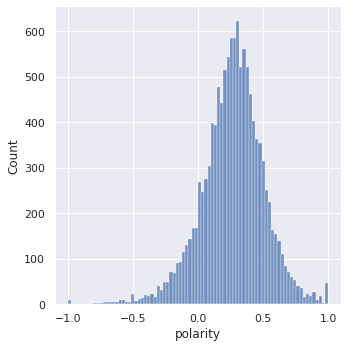

In [ ]:
sns.displot(df.polarity)
plt.show()


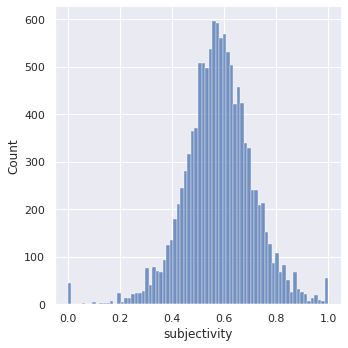

In [ ]:
sns.displot(df.subjectivity)
plt.show()


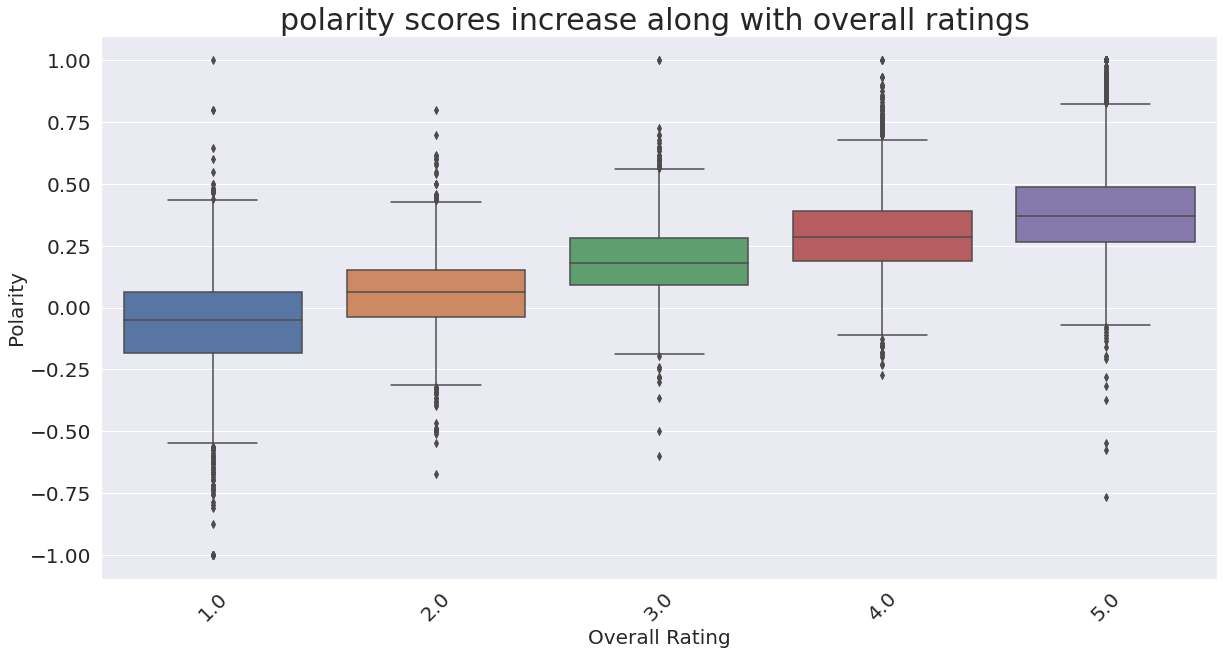

In [ ]:
## the relationship between user view ratings and the polarity score 

ax=sns.boxplot(y="polarity", x="stars_y", data=df)


ax.axes.set_title("polarity scores increase along with overall ratings ",fontsize=30)
ax.set_ylabel("Polarity",fontsize=20)
ax.set_xlabel("Overall Rating",fontsize=20)
ax.tick_params(labelsize=20)
plt.xticks(rotation = 45)

plt.show()

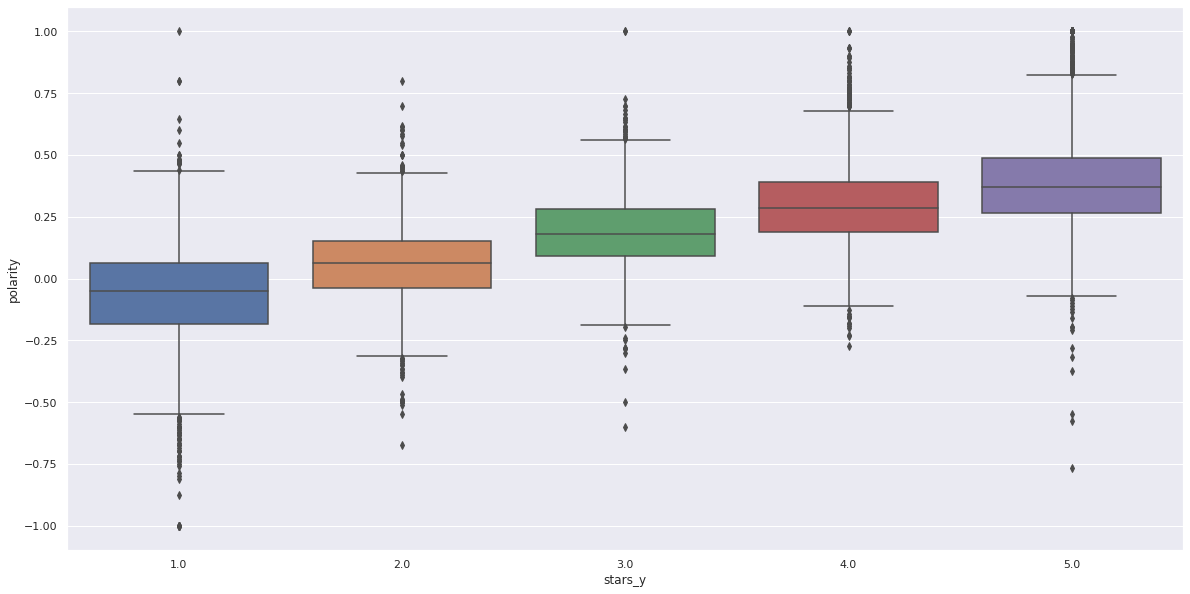

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

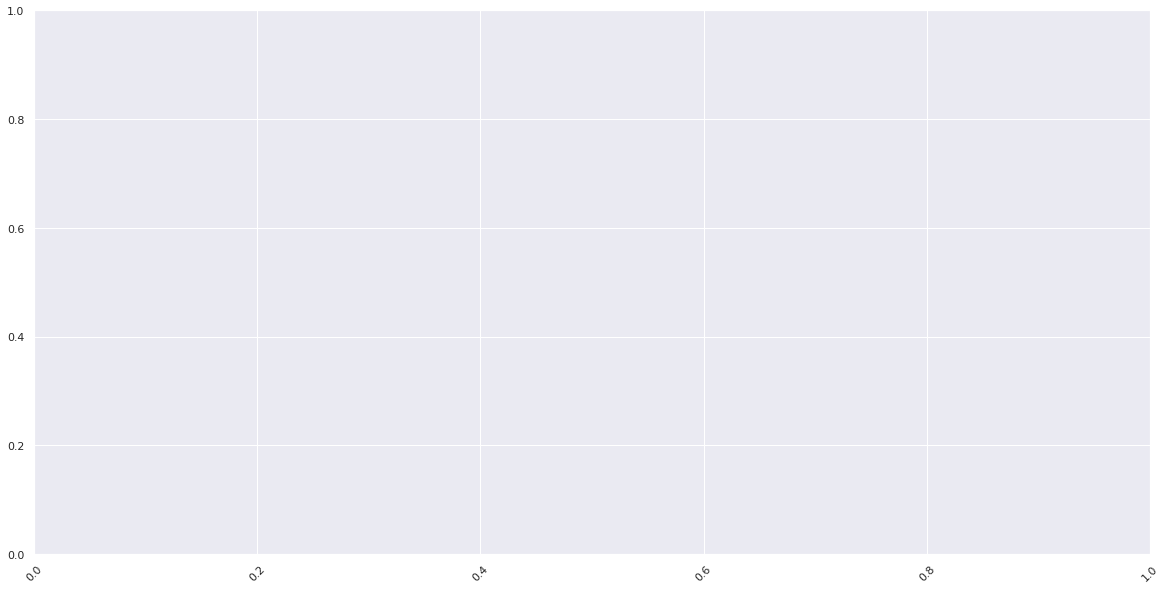

In [ ]:
## the relationship between user view ratings and the polarity score 

w=sns.boxplot(y="polarity", x="stars_y", data=df)
plt.show()

w.axes.set_title("polarity scores increase along with overall rating ",fontsize=40)
w.set_ylabel("Polarity",fontsize=30)
w.set_xlabel("Overall Rating",fontsize=30)
w.tick_params(labelsize=25)
plt.xticks(rotation = 45)

In [ ]:
## Afinn Score
afinn = Afinn(language='en')


def sent_score(text):
  return afinn.score(text)

df['sent'] = df.text.apply(sent_score)

df.head()

,name,address,city,state,postal_code,latitude,longitude,rating,review_count,is_open,attributes,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,polarity,subjectivity,sent
business_id,,,,,,,,,,,,,,,,,,,,,,,,
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",4xK2AMJhE-Iq9oqs63oPqw,h-jetz5lt09D_MXF_UdZ0A,5.0,4.0,2.0,3.0,New family business from Los Angeles. Pho was ...,2019-07-28 18:33:42,0.252273,0.590909,7.0
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",cz-jm7g1Wli7wTtliSl6lg,sdVAL7EuOCmN9Y2Zhm_hxg,4.0,0.0,0.0,0.0,The egg rolls - pretty great & fresh.\n\nThe l...,2019-10-25 02:06:29,0.369643,0.611310,16.0
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",tzwhl-xFnJ9v5-BnO36ivA,bh6rKHiOgg51omiYkQRquA,5.0,3.0,4.0,5.0,"TL, DR: Best banh mi in Cleveland.\n\n1. I ord...",2019-08-29 19:06:03,0.148381,0.454555,12.0
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",t-7SDtRASihHpTNpalluYw,YCcao-FE5wMhUSDh9eeD5A,5.0,1.0,1.0,2.0,"New restaurant, this location been under manag...",2019-09-24 01:53:11,0.232311,0.495896,14.0
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",Y9XbnZ01Uih9dfADzCHyTQ,_IKHZkxIA8w4y9cyRYOG2w,5.0,2.0,1.0,1.0,I only tried the bun bo hue but it was delicio...,2019-09-14 17:00:49,0.271667,0.520000,10.0


In [ ]:
df['sent'].describe().T

count    12129.000000
mean        11.370682
std         11.040199
min        -65.000000
25%          5.000000
50%         10.000000
75%         17.000000
max         97.000000
Name: sent, dtype: float64

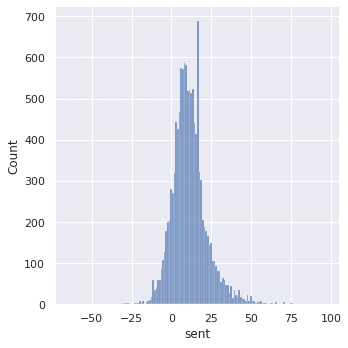

In [ ]:
sns.displot(df.sent)
plt.show()


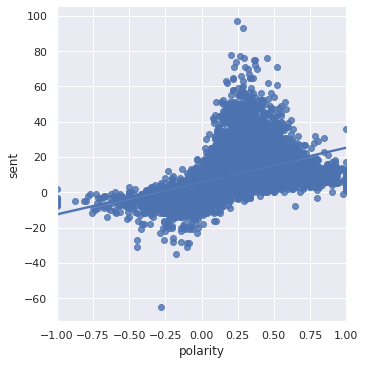

In [ ]:
## the relationship between polarity and afinn score in our dataset

sns.lmplot(x="polarity", y="sent", data=df)
plt.show()


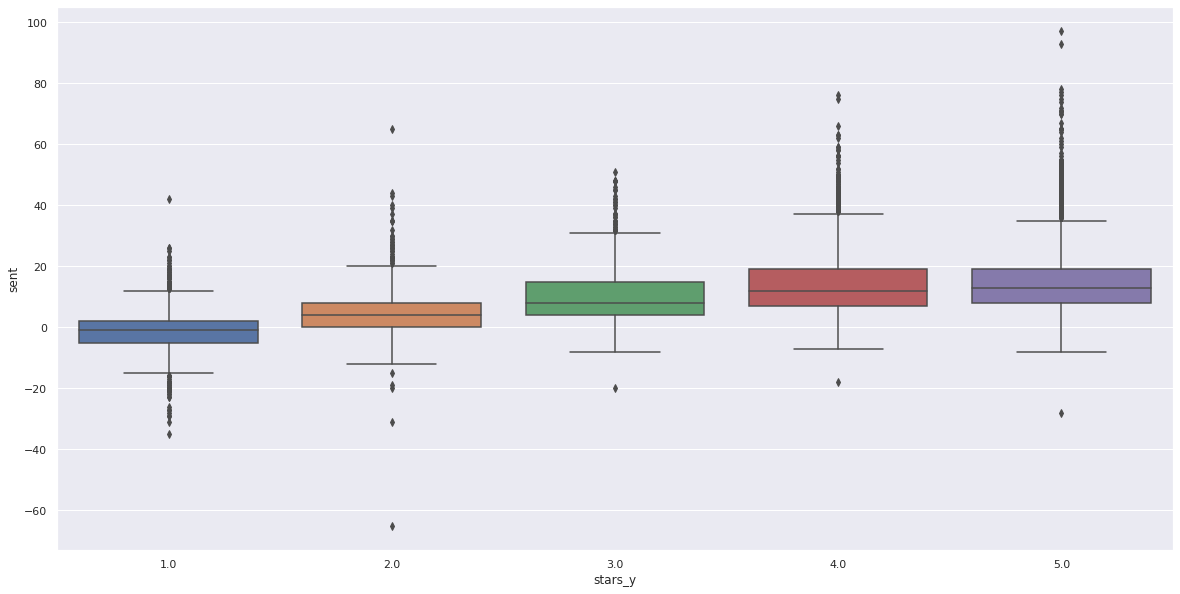

In [ ]:
## the relationship between user view ratings and the affin score 

sns.boxplot(y="sent", x="stars_y", data=df)
plt.show()

In [ ]:
df.head()

,name,address,city,state,postal_code,latitude,longitude,rating,review_count,is_open,attributes,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,polarity,subjectivity,sent
business_id,,,,,,,,,,,,,,,,,,,,,,,,
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",4xK2AMJhE-Iq9oqs63oPqw,h-jetz5lt09D_MXF_UdZ0A,5.0,4.0,2.0,3.0,New family business from Los Angeles. Pho was ...,2019-07-28 18:33:42,0.252273,0.590909,7.0
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",cz-jm7g1Wli7wTtliSl6lg,sdVAL7EuOCmN9Y2Zhm_hxg,4.0,0.0,0.0,0.0,The egg rolls - pretty great & fresh.\n\nThe l...,2019-10-25 02:06:29,0.369643,0.611310,16.0
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",tzwhl-xFnJ9v5-BnO36ivA,bh6rKHiOgg51omiYkQRquA,5.0,3.0,4.0,5.0,"TL, DR: Best banh mi in Cleveland.\n\n1. I ord...",2019-08-29 19:06:03,0.148381,0.454555,12.0
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",t-7SDtRASihHpTNpalluYw,YCcao-FE5wMhUSDh9eeD5A,5.0,1.0,1.0,2.0,"New restaurant, this location been under manag...",2019-09-24 01:53:11,0.232311,0.495896,14.0
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",Y9XbnZ01Uih9dfADzCHyTQ,_IKHZkxIA8w4y9cyRYOG2w,5.0,2.0,1.0,1.0,I only tried the bun bo hue but it was delicio...,2019-09-14 17:00:49,0.271667,0.520000,10.0


In [ ]:
## The relationship between resturant ratings and the sentiment score of the reviews

## look at mean 
## Higher general rating resturants are associated with higher polairty score and higher sentiment score, 
### Addtionally, the higher rating restuarants tend to receive more reviews towards expressing personal feelings or opinions, rather than statements of facts.


df.groupby("rating").agg({'polarity':['size','mean'],'sent':['mean'],'subjectivity':['mean']})

polarity                 sent subjectivity
           size      mean       mean         mean
rating                                           
1.0          44 -0.146413  -4.363636     0.555395
1.5         127 -0.054028  -1.078740     0.561719
2.0         180 -0.053431  -0.011111     0.540632
2.5         317  0.095048   4.041009     0.543405
3.0         950  0.167032   7.020000     0.558770
3.5        2129  0.239577  10.618600     0.574846
4.0        4972  0.291625  12.239944     0.586738
4.5        3203  0.316226  13.572276     0.587169
5.0         207  0.359478  16.231884     0.606727

In [ ]:
# The relationship between resturant ratings and the sentiment score of the reviews

# look at median 


df.groupby("rating").agg({'polarity':['size','median'],'sent':['median'],'subjectivity':['median']})

polarity             sent subjectivity
           size    median median       median
rating                                       
1.0          44 -0.091146   -3.5     0.560275
1.5         127 -0.081605   -1.0     0.550794
2.0         180 -0.055952   -1.0     0.554827
2.5         317  0.100000    3.0     0.558333
3.0         950  0.162582    6.0     0.559246
3.5        2129  0.252381    9.0     0.574074
4.0        4972  0.294683   11.0     0.583574
4.5        3203  0.305926   12.0     0.585714
5.0         207  0.347826   13.0     0.607181

In [ ]:
# vader -- more suitable for social media

nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df.head()

,name,address,city,state,postal_code,latitude,longitude,rating,review_count,is_open,attributes,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,polarity,subjectivity,sent
business_id,,,,,,,,,,,,,,,,,,,,,,,,
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",4xK2AMJhE-Iq9oqs63oPqw,h-jetz5lt09D_MXF_UdZ0A,5.0,4.0,2.0,3.0,New family business from Los Angeles. Pho was ...,2019-07-28 18:33:42,0.252273,0.590909,7.0
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",cz-jm7g1Wli7wTtliSl6lg,sdVAL7EuOCmN9Y2Zhm_hxg,4.0,0.0,0.0,0.0,The egg rolls - pretty great & fresh.\n\nThe l...,2019-10-25 02:06:29,0.369643,0.611310,16.0
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",tzwhl-xFnJ9v5-BnO36ivA,bh6rKHiOgg51omiYkQRquA,5.0,3.0,4.0,5.0,"TL, DR: Best banh mi in Cleveland.\n\n1. I ord...",2019-08-29 19:06:03,0.148381,0.454555,12.0
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",t-7SDtRASihHpTNpalluYw,YCcao-FE5wMhUSDh9eeD5A,5.0,1.0,1.0,2.0,"New restaurant, this location been under manag...",2019-09-24 01:53:11,0.232311,0.495896,14.0
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",Y9XbnZ01Uih9dfADzCHyTQ,_IKHZkxIA8w4y9cyRYOG2w,5.0,2.0,1.0,1.0,I only tried the bun bo hue but it was delicio...,2019-09-14 17:00:49,0.271667,0.520000,10.0


In [ ]:
df['compound'] = [vader.polarity_scores(v)['compound'] for v in df['text']]
df['neg'] = [vader.polarity_scores(v)['neg'] for v in df['text']]
df['neu'] = [vader.polarity_scores(v)['neu'] for v in df['text']]
df['pos'] = [vader.polarity_scores(v)['pos'] for v in df['text']]

In [ ]:
df.head()

,name,address,city,state,postal_code,latitude,longitude,rating,review_count,is_open,attributes,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,polarity,subjectivity,sent,compound,neg,neu,pos
business_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",4xK2AMJhE-Iq9oqs63oPqw,h-jetz5lt09D_MXF_UdZ0A,5.0,4.0,2.0,3.0,New family business from Los Angeles. Pho was ...,2019-07-28 18:33:42,0.252273,0.590909,7.0,0.7269,0.000,0.855,0.145
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",cz-jm7g1Wli7wTtliSl6lg,sdVAL7EuOCmN9Y2Zhm_hxg,4.0,0.0,0.0,0.0,The egg rolls - pretty great & fresh.\n\nThe l...,2019-10-25 02:06:29,0.369643,0.611310,16.0,0.9709,0.000,0.613,0.387
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",tzwhl-xFnJ9v5-BnO36ivA,bh6rKHiOgg51omiYkQRquA,5.0,3.0,4.0,5.0,"TL, DR: Best banh mi in Cleveland.\n\n1. I ord...",2019-08-29 19:06:03,0.148381,0.454555,12.0,0.9512,0.034,0.834,0.132
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",t-7SDtRASihHpTNpalluYw,YCcao-FE5wMhUSDh9eeD5A,5.0,1.0,1.0,2.0,"New restaurant, this location been under manag...",2019-09-24 01:53:11,0.232311,0.495896,14.0,0.9615,0.000,0.742,0.258
98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': ""{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",Y9XbnZ01Uih9dfADzCHyTQ,_IKHZkxIA8w4y9cyRYOG2w,5.0,2.0,1.0,1.0,I only tried the bun bo hue but it was delicio...,2019-09-14 17:00:49,0.271667,0.520000,10.0,0.9627,0.000,0.738,0.262


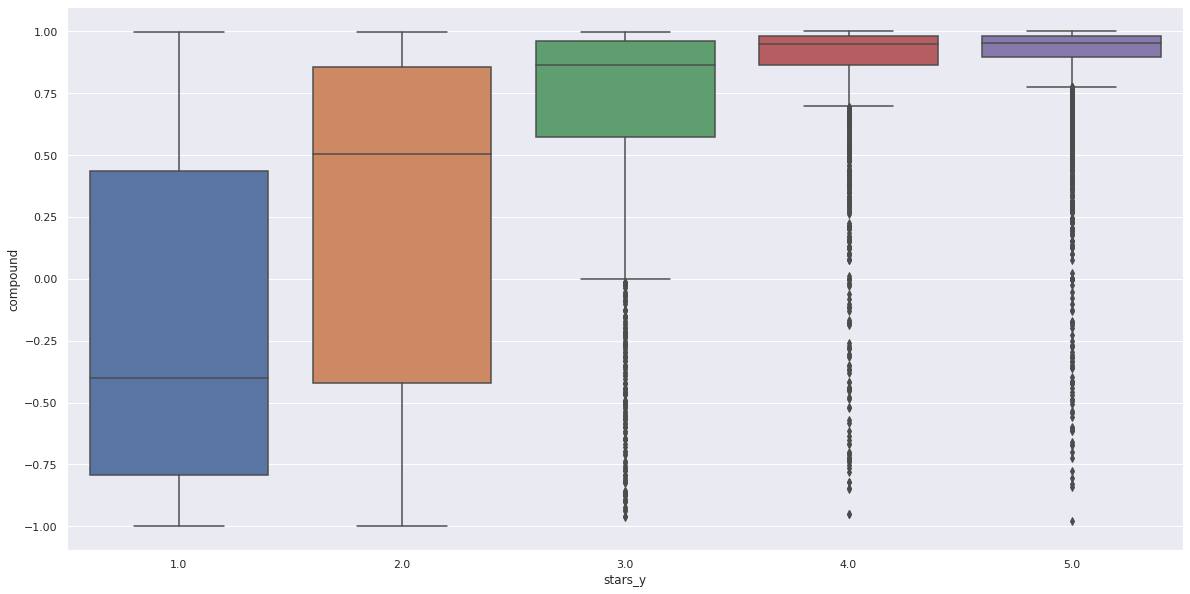

In [ ]:
# the relationship between user view ratings and the affin score 

sns.boxplot(y="compound", x="stars_y", data=df)
plt.show()

In [ ]:
## The relationship between resturant ratings and the sentimemnt analysis scores
## look at mean 
## Compound scores tent to intensify the postive and negative score on a [1,-1] scale compared with polairty


df.groupby("rating").agg({'polarity':['size','mean'],'compound':['mean'],'sent':['mean'],'subjectivity':['mean'],'neg':['mean'],'neu':['mean'],'pos':['mean']})

polarity            compound  ...       neg       neu       pos
           size      mean      mean  ...      mean      mean      mean
rating                               ...                              
1.0          44 -0.146413 -0.365852  ...  0.141068  0.804318  0.054614
1.5         127 -0.054028 -0.153475  ...  0.107205  0.802220  0.090559
2.0         180 -0.053431 -0.084234  ...  0.100806  0.805750  0.093494
2.5         317  0.095048  0.259590  ...  0.076574  0.775855  0.147568
3.0         950  0.167032  0.437313  ...  0.063881  0.765774  0.170348
3.5        2129  0.239577  0.634132  ...  0.047145  0.744532  0.208324
4.0        4972  0.291625  0.734045  ...  0.037886  0.734042  0.228066
4.5        3203  0.316226  0.823219  ...  0.030053  0.722974  0.246967
5.0         207  0.359478  0.904071  ...  0.020768  0.720488  0.258744

[9 rows x 8 columns]

In [ ]:
##  Examine the most popular resturants in Cleveland (with the largest number of reviews)---Townhall

df.loc['LNsZJP6jZ11e0tDljOLPiQ'].head(5)
#df.sort_values(by='review_count',ascending=False)
Townhall = df.loc['LNsZJP6jZ11e0tDljOLPiQ']
Townhall.head()

,name,address,city,state,postal_code,latitude,longitude,rating,review_count,is_open,attributes,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,polarity,subjectivity,sent,compound,neg,neu,pos
business_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LNsZJP6jZ11e0tDljOLPiQ,Townhall,1909 W 25th St,Cleveland,OH,44113,41.485492,-81.703914,4.0,1372,1,"{'HasTV': 'True', 'RestaurantsPriceRange2': '2...","Food, American (New), Salad, Sandwiches, Beer,...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",F6kIzXYoVOIoKu4s6Rbeew,pHKISjytTmP0LrP952_32w,5.0,2.0,1.0,1.0,I absolutely love Townhall! Every time I'm in ...,2019-03-19 02:13:36,0.348485,0.615909,14.0,0.9763,0.026,0.656,0.318
LNsZJP6jZ11e0tDljOLPiQ,Townhall,1909 W 25th St,Cleveland,OH,44113,41.485492,-81.703914,4.0,1372,1,"{'HasTV': 'True', 'RestaurantsPriceRange2': '2...","Food, American (New), Salad, Sandwiches, Beer,...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",9s4ChvFY-2XP9hcvmll6aQ,KmCWo0-cXlvRN7bVn0cN4A,4.0,1.0,1.0,1.0,"I've been to Townhall at least once before, wi...",2019-03-14 04:50:08,0.332698,0.481799,25.0,0.9898,0.000,0.720,0.280
LNsZJP6jZ11e0tDljOLPiQ,Townhall,1909 W 25th St,Cleveland,OH,44113,41.485492,-81.703914,4.0,1372,1,"{'HasTV': 'True', 'RestaurantsPriceRange2': '2...","Food, American (New), Salad, Sandwiches, Beer,...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",9TFPPWWpDtdW5mEU9kqvsQ,QLr0eTpmN1o9UIXgFuezJg,5.0,0.0,0.0,0.0,Went here last weekend to pre-game before Beer...,2019-02-01 20:48:34,0.306030,0.557476,32.0,0.9928,0.020,0.780,0.200
LNsZJP6jZ11e0tDljOLPiQ,Townhall,1909 W 25th St,Cleveland,OH,44113,41.485492,-81.703914,4.0,1372,1,"{'HasTV': 'True', 'RestaurantsPriceRange2': '2...","Food, American (New), Salad, Sandwiches, Beer,...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",oiNubi7mOyQ_Njx_vs_R1w,FLVxlD8o5kko8NouQW6ZXg,1.0,0.0,0.0,0.0,I only liked the fries I'm from Toledo Ohio I'...,2019-03-29 18:22:41,0.119394,0.784091,3.0,-0.4478,0.120,0.784,0.096
LNsZJP6jZ11e0tDljOLPiQ,Townhall,1909 W 25th St,Cleveland,OH,44113,41.485492,-81.703914,4.0,1372,1,"{'HasTV': 'True', 'RestaurantsPriceRange2': '2...","Food, American (New), Salad, Sandwiches, Beer,...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",a5g9wNdKJVkfqEWO7msSFw,xl241CE1PuPv1h7N69oMDA,4.0,1.0,1.0,1.0,I really enjoyed the Founders beer. It was ver...,2019-05-19 00:34:06,0.398080,0.560000,9.0,0.9476,0.000,0.755,0.245


In [ ]:
## The reviews of townhall' sentiment scores

Townhall[['polarity','compound','sent']].describe()

,polarity,compound,sent
count,214.000000,214.000000,214.000000
mean,0.322718,0.752484,12.345794
std,0.228018,0.460771,10.000097
min,-0.433333,-0.971100,-9.000000
25%,0.179384,0.796025,6.000000
50%,0.330536,0.942600,12.000000
75%,0.447294,0.976275,17.000000
max,1.000000,0.999000,59.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


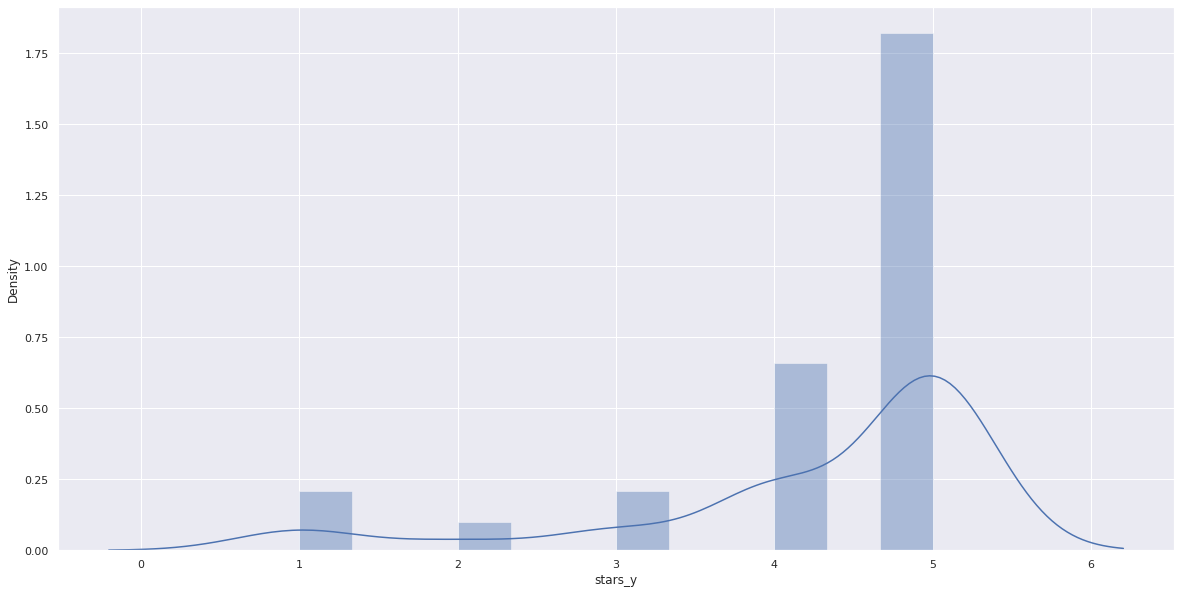

In [ ]:
# Townhall will recieve low ratings from customers, but receive significantly more 5 star & 4 star ratings.  

sns.distplot(Townhall.stars_y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

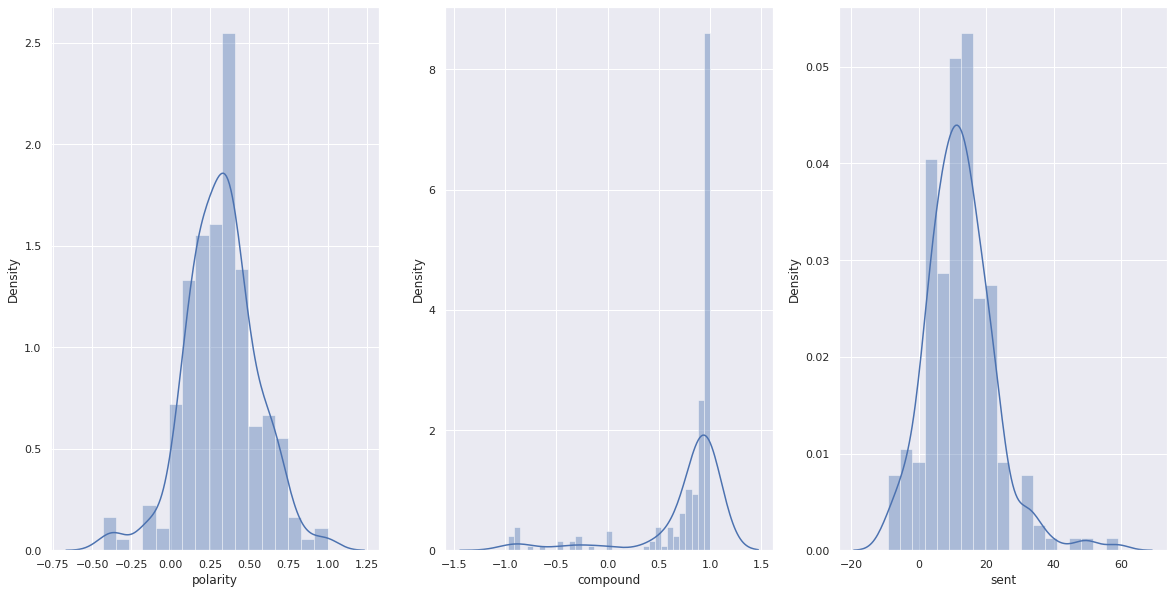

In [ ]:
## Look at the specific sentiment score of Townhall's reviews

f, axes = plt.subplots(1, 3)

townhall = Townhall.reset_index(drop=True)

sns.distplot(townhall.polarity,ax=axes[0])
sns.distplot(townhall.compound,ax=axes[1])
sns.distplot(townhall.sent,ax=axes[2])

In [ ]:
## Look at what are the hottest words appeared in Townhall's reviews


tokens_townhall = cv2.fit_transform(Townhall.text)
cv2.vocabulary_
cv2.get_feature_names()
tarr_townhall= tokens_townhall.toarray()

t_townhall = pd.DataFrame(tarr_townhall, columns=cv2.get_feature_names())
t_townhall.head()
t_townhall.sum(axis=0).sort_values(ascending=False).head(50)

truffle fries           22
non gmo                 14
gluten free             11
great place             10
veggie burger            9
sweet potato             8
great atmosphere         8
beer selection           7
dietary restrictions     7
smashed avocado          7
poke bowl                7
thai peanut              7
favorite restaurant      7
peanut bowl              6
place eat                6
grass fed                6
one favorite             6
chicken sandwich         6
reasonably priced        6
brussel sprouts          6
favorite place           6
lettuce wraps            6
also good                6
keto bun                 6
place cleveland          5
restaurant cleveland     5
dietary needs            5
craft beer               5
flat bread               5
great great              5
place good               5
town hall                5
keto friendly            5
chicken bowl             5
paleo keto               5
great beer               5
healthy options          5
g

In [ ]:
## Insights:

##When analyzing the most popular restaurant in 2019 – the Townhall, 
## we noticed that healthy meals might be gaining more popularity than we expected, 
## as evidenced by the fact that gluten-free, veggie burger, keto bun, grass feed, and dietary restriction
## are among the hottest words in Townhall restaurant’ reviews. 



In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import random

In [ ]:
# key word analysis



lower = df[df.polarity <=0]
higher = df[df.polarity > 0.3]

from nltk import Text

keyword_lower = lower.text
keyword_lower[:5]

corpus_lower = " ".join(keyword_lower)

tokens_lower = nltk.word_tokenize(corpus_lower)

text_lower= Text(tokens_lower)

# higher polarity 

keyword_higher = higher.text
keyword_higher[:5]

corpus_higher= " ".join(keyword_higher)

tokens_higher = nltk.word_tokenize(corpus_higher)

text_higher= Text(tokens_higher)



In [ ]:
#look at service

text_lower.concordance("service",width=100)


Displaying 25 of 616 matches:
                                              service , I came with my family of four . No one gree
eese & rice here now , its 6:50pm only . Fast service & busy . Alright place . I rarely Chipotle no
e of the reviews just now ) at this place the service was s l o w . . so slow in pAST VISITS . not 
Heck , I left a few times because of the slow service . Just keep that in mind for here . I 've alw
 way too long . No efficiency here ! horrible service extremely slow that 's it already awkward whe
ctically Milk dip . The salsa was bland . The service was fine , the place itself was fine , but af
rrio is your place , horrible food , horrible service , horrible crowd . Do yourself a favor and co
 of day , age , what your ordered , etc ! Bad service . Bad food . Grimy menus . Barrio is an examp
wn several times . In addition to the abysmal service , the food was pretty bad . The tacos were so
 food was well priced and well made , but the service ruined the exper

In [ ]:
text_lower.concordance("manager",width=150)

Displaying 25 of 180 matches:
 can make better tacos at home . After a recent visit with friends the manager came over to our table and accused someone in our party of throwing up
 can make better tacos at home . After a recent visit with friends the manager came over to our table and accused someone in our party of throwing up
x , obviously , ... waitress almost smacked me in the face w/the box , manager only took off $ 3 . ( I work at a restaurant as well , and this is n't
 and this is n't really how we treat guest ) . I asked to speak to the manager to see was there more he could do ... he literally laughed in my face 
orst service They dont care about you Foods arw good Waitress are rude Manager dont care about you Unfortunately I have to give this spot a poor revi
d visit 03/20/19 @ 12:15 pm . I attempted to order the flatbread . The manager ? said he could n't do it . Not sure if the pizza oven broke but I sho
d visit 03/20/19 @ 12:15 pm . I attempted to order the flatbread . The

In [ ]:
text_lower.concordance("food",width=100)

Displaying 25 of 1100 matches:
oed throughout the establishment . Now onto the food , coming from a Vietnamese background , I have 
have eaten authentic Vietnamese cuisine and the food was just okay . I ordered the bun bo hue and li
 that in mind for here . I 've always liked the food I gotten from them . OMG ! I used to love this 
 was so damn hungry and as I see them serve the food I notice no steam coming out of its Rice and ch
 it already awkward when they come out with the food . They do n't check up on you , they do n't apo
is is freaking pathetic ! If gentrified Mexican food is your thing Barrio is your place , horrible f
d is your thing Barrio is your place , horrible food , horrible service , horrible crowd . Do yourse
 seemed like it was normal to find hair in your food after you 've already finished half . and she b
an option , this place is just THAT BAD . Worst food in the world , servers are DRY and weird . Neve
e , what your ordered , etc ! Bad service . Bad food . Grimy

In [ ]:

text_higher.concordance("service",width=100)

Displaying 25 of 1850 matches:
ing . Really good flavor in the broth and the service was excellent . I will be back ! PHOLEE PHOOK
ket . Well worth a visit . Clean and friendly service . Enjoyed the marinated rib and veggie dinner
 enter . Super awesome and excellent customer service by the black- and red-haired manager-type of 
ything was great ! The food was tasty and the service was great ! Will come again and recommend . W
rance as it 's not marked very well , but the service was great and the food was spot on . I love t
s great and the food was spot on . I love the service here . Every time someone comes in they greet
d the cocktails were outstanding ! Food : 5/5 Service : 4/5 Ambience : 4/5 Ginko is probably my fav
, and intimate . The menu is incredible . The service is amazing . Arrive early so you can get a se
 ! WOW ! Preposterously great food , menu and service . Not cheap but affordable . Nice atmosphere 
your mouth . Sushi bar is mesmerizing and the service is impeccable .

In [ ]:

# lun = pd.read_csv('cle_lunch.csv')
# lun.shape
# lun.index.unique().size

In [ ]:
# lun2019 = lun[lun['date']>= '2019-01-01 00:00:00']

# lun2019.shape
# lun2019.index.unique().size

# lun2019 = lun2019[['business_id']]
# lun2019['lunch'] = 1
# lun2019.head()

In [ ]:
# din = pd.read_csv('cle_dinner.csv')
# din.shape
# din.index.unique().size



In [ ]:
# din2019 = din[din['date']>= '2019-01-01 00:00:00']

# din2019.shape
# din2019.index.unique().size

# din2019 = din2019[['business_id']]
# din2019['dinner'] = 1
# din2019.head()

In [ ]:
# brun = pd.read_csv('cle_brunch.csv')
# brun.shape
# brun.index.unique().size

# brun2019 = brun[brun['date']>= '2019-01-01 00:00:00']

# brun2019.shape
# brun2019.index.unique().size

# brun2019 = brun2019[['business_id']]
# brun2019['brunch'] = 1
# brun2019.head()

In [ ]:
# bre = pd.read_csv('cle_breakfast.csv')
# bre.shape
# bre.index.unique().size

# bre2019 = bre[bre['date']>= '2019-01-01 00:00:00']

# bre2019.shape
# bre2019.index.unique().size

In [ ]:
# df_meal = pd.merge(df,din2019,on='business_id',how='left')
# df_meal = pd.merge(df_meal,lun2019,on='business_id',how='left')
# df_meal = pd.merge(df_meal,brun2019,on='business_id',how='left')

In [ ]:
# df_meal.head()

In [ ]:
#Spacy

# import nltk
# nltk.download('punkt')

# import spacy.cli
# spacy.cli.download("en_core_web_md")
# nlp= spacy.load("en_core_web_md")


In [ ]:
# df.shape

In [ ]:
# comments = df["text"]
# comments

# comment = comments.to_string()
# comments.shape

In [ ]:
# doc = nlp(l)